# Steroids in baseball:

Since the 90s has - as any other sport - has had its issues with steroids. If we disregard the ethics of taking a unnatural perfomance enhancer and only consider the possible danger both to the players health and risks of beeing caught - why would a player take a banned substance?

Obviously a player would take a banned substance in the hope of prolonging a career or improving enough to make it to - and stay - in the MLB. A way to measure how good a player is to measure his earnings. Therefore the question of taking a banned substance boils down to a players worth, will it improve the players worth? So how can we do that? There are several factor contributing to a players worth but if we exclude pitchers, hits are probably by far the most important metric. So, to begin answering the question of why steroids I've choosen to look at the following questions:

- What is the mean income for an mlb player from 1990 until end of 2014 compared to players caught taking steroids 
- Except pitchers, hits are the biggest factor in determening a players salary. But what is the relationship between salaries and hits? Is there a strong link?.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Import the csv files needed and return the DataFrame
def get_file (filename):
    the_file = pd.read_csv(filename)
    return the_file

master_df = get_file('Master.csv')
salaries_df = get_file('Salaries.csv')
batting_df = get_file('Batting.csv')
fielding_df = get_file('Fielding.csv')



# clean the DataFrames - only the columns we want
master_df = master_df[['playerID','nameFirst','nameLast','retroID','bbrefID']]
salaries_df = salaries_df[['yearID', 'playerID', 'salary']]
fielding_df = fielding_df[['playerID', 'yearID', 'POS']]

#### add column indicating if player has been convicted of steroid use
master_df.insert(5, 'Steroid', False)



In [2]:
#### focus on relevant years 1990 - 2014
def clean_and_remove (data):
    years = range(1990, 2015)
    return data.loc[(data['yearID'].isin(years))]

#master_df = clean_and_remove(master_df)
fielding_df = clean_and_remove(fielding_df)
salaries_df = clean_and_remove(salaries_df)
batting_df = clean_and_remove(batting_df)



In [3]:
####remove pitchers from fielding    
fielding_df = fielding_df.loc[fielding_df['POS'] != 'P']
fielding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42441 entries, 109460 to 167937
Data columns (total 3 columns):
playerID    42441 non-null object
yearID      42441 non-null int64
POS         42441 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [4]:
#### merge salary and master DF - if column is already in master_df - it has been already done. 
if 'POS' not in master_df.columns:
    master_df = master_df.merge(fielding_df, on = 'playerID', how = 'inner')
master_df.head()


playerID nameFirst nameLast   retroID    bbrefID Steroid  yearID POS
0   abadan01      Andy     Abad  abada001   abadan01   False    2001  1B
1   abadan01      Andy     Abad  abada001   abadan01   False    2003  1B
2   abadan01      Andy     Abad  abada001   abadan01   False    2003  OF
3   abadan01      Andy     Abad  abada001   abadan01   False    2003  RF
4  abbotje01      Jeff   Abbott  abboj002  abbotje01   False    1997  CF

In [5]:
if 'salary' not in master_df.columns:
    master_df = master_df.merge(salaries_df, on = ['playerID', 'yearID' ], how = 'inner')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31953 entries, 0 to 31952
Data columns (total 9 columns):
playerID     31953 non-null object
nameFirst    31953 non-null object
nameLast     31953 non-null object
retroID      31953 non-null object
bbrefID      31953 non-null object
Steroid      31953 non-null bool
yearID       31953 non-null int64
POS          31953 non-null object
salary       31953 non-null int64
dtypes: bool(1), int64(2), object(6)
memory usage: 2.2+ MB


In [6]:
if 'H' not in master_df.columns:
    master_df = master_df.merge(batting_df, on = ['playerID', 'yearID' ], how = 'inner')

In [7]:
#Import the player convicted of using steroids - source wikipedia 
##https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_players_suspended_for_performance-enhancing_drugs

steroid_players_df = get_file('Steroid_players.csv')

### create columns - don't actually need them all for this project but...
steroid_players_df.columns = 'nameFirst', 'Team','Date announced','Drug', 'Penalty','Position','Response','Ref'
### instert namelast column in df
steroid_players_df.insert(1, 'nameLast', "last name")

### Split the names in namefirst and namelast
steroid_players_df['nameLast']= steroid_players_df['nameFirst'].str.split().str.get(-1)
steroid_players_df['nameFirst']= steroid_players_df['nameFirst'].str.split().str.get(0)


From printing out steroid_players_df.info() we notice that several players have incomplete fields. But we only care about the names. For this exploration we could delete the other columns but I want to keep them just in case I'm coming back to this exploration at a later time 

In [8]:
###### find playerID for steroid players to locate in master_df 

steroid_playerID = pd.Series(master_df.loc[master_df['nameLast'].isin(steroid_players_df['nameLast']) 
                                           & (master_df.nameFirst).isin(steroid_players_df.nameFirst)].playerID.unique())
print 'Matched:', steroid_playerID.size, 'in master_df dataframe'  



Matched: 66 in master_df dataframe


We have 128 entires in the steroid_players_df but only matched 66 players to master_df. Why is that? The biggest factor is that we have deicided to exclude pitchers, but we also have different spellings of names. I choose not to go in and manually overwrite the names to match up with master_df 

In [9]:
#### Lookup player convicted of steroid use and mark column steroid as true   
master_df.loc[master_df['playerID'].isin(steroid_playerID), 'Steroid'] = True

#print master_df

### get mean salary for clean , steroid and all
Steroid = int(master_df.loc[master_df['Steroid'] == True]['salary'].mean())
Clean = int(master_df.loc[master_df['Steroid'] == False]['salary'].mean())
all_players = int(master_df['salary'].mean())

### insert them into a dict
d = ({'Steroid players':Steroid,
      'non steroid players':Clean,
      'all players':all_players })
###instert the dict to a dataframe
mean_salary_df = pd.DataFrame(data=d, index = ['Salary'])

print mean_salary_df

        Steroid players  all players  non steroid players
Salary          3245201      1916319              1873830


In [10]:
#### print the data as bar
%pylab inline
mean_salary_df.plot(kind = 'bar', title ='Mean salary', grid = True,  fontsize = 'small')

Populating the interactive namespace from numpy and matplotlib


Mean salary for players:

We can see from the bar chart that steroid player made about 1,3 million USD more per year in 1990 - 2014. But how has the salaries developed over time? For that we need to plot the salaries one a line chart.


In [11]:

steroid_salary = []
clean_salary = []

years = range(1990, 2015)
for year in years:
    steroid_salary.append(master_df.loc[(master_df['yearID'] == year) & (master_df['Steroid']==True)]['salary'].mean())
    clean_salary.append(master_df.loc[(master_df['yearID'] == year) & (master_df['Steroid']==False)]['salary'].mean())
    

salary_per_year_df = pd.DataFrame ({ 'Steroid mean per year': steroid_salary, 'Clean mean per year': clean_salary}, index = years )
salary_per_year_df.plot()


#print int(salary_per_year_df['Clean mean per year'].mean())
#print int(master_df.loc[master_df['Steroid']==False]['salary'].mean())

From 1990 until 1997 steroid player actually made less than clean players. But something happend closer to 2000 and the avg salary for player convicted of steroid abuse skyrocketed compared to clean players.  Don't know why that is because we don't know how long the individual players have took banned substances. Therefore we can't say for certain if the substance was used to improve or to slow down a potential decline - because of age and/or injury.  

But, unfortunately even though the salaries have converged in later years, it still looks like steroid abuse affects a position players abillity to increase their earning potential.

So what affects a players salary? How does the leauge determine a players worth? To begin answering that question I've looked at how hits affect the mean salary in the leauge. 


MLB players salaries are based on the regular season only. During the postseason there is a revenueshare between the players. Therefore I've chosen to only include regular season statistics.

In [12]:
### Remove pitchers and aggregate the relevant years to YoY statistics
years = range(1990, 2015)
def mean_per_year(data_df, lookup):
    mean = []
    for year in years:
        mean.append(data_df.loc[(data_df['yearID'] == year)][lookup].mean())
    return mean  
                    
hits_per_year = pd.Series(mean_per_year(master_df, 'H'), index = years)
salary_per_year = pd.Series(mean_per_year(master_df, 'salary'), index = years)
#print salary_per_year.head()


salary_hit_df = pd.DataFrame({'Salary' : salary_per_year, 'Hits' : hits_per_year}, index = [years])

Populating the interactive namespace from numpy and matplotlib
The correlation between salary and hits for none-pitchers is: 0.446285229362


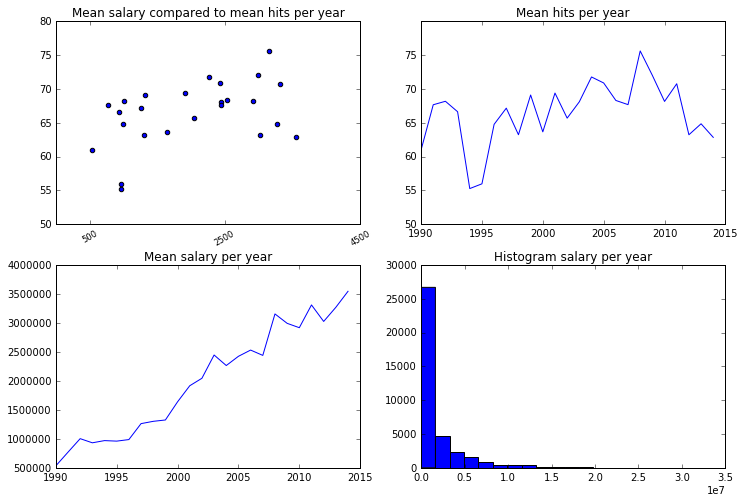

In [13]:
%pylab inline
#### create figure to hold two subplots
fig = plt.figure(figsize = [12,8])

### add salary - hits per year scatterplot
ax = fig.add_subplot(2,2,1)
ax.scatter(salary_hit_df['Salary'], salary_hit_df['Hits'])
ticks = ax.set_xticks([500000, 2500000, 4500000]) 
labels = ax.set_xticklabels([500, 2500,4500],rotation=30, fontsize = 'small')
ax.set_title ('Mean salary compared to mean hits per year')

### add mean hits per year lineplot
ax1 = fig.add_subplot(2,2,2)
ax1.plot(salary_hit_df['Hits'])
ticks = ax1.set_yticks([50,55,60,65,70,75]) 
ax1.set_title ('Mean hits per year')

ax2 = fig.add_subplot(2,2,3)
ax2.plot(salary_hit_df['Salary'])
ax2.set_title ('Mean salary per year')



ax3 = fig.add_subplot(2,2,4)
ax3.hist(master_df['salary'], bins = 20)
ax3.set_title ('Histogram salary per year')


print 'The correlation between salary and hits for none-pitchers is:', salary_hit_df['Hits'].corr(salary_hit_df['Salary'])
#print non_pitchers_hits.std(ddof=0)
#print non_pitchers_salary.std(ddof=0)

Looking at the scatter chart it looks like there is moderate link between a players salary and hits (Corr = 0.44). Furthermore, looking at the mean hits per year there was a drastic decline in 1993-1995 while the mean salary roughly stayed the same. After 1998 salaries and hits started to increase before hits reached a peak of 75 in 2008 and from there the mean salary and hits started deviating until today.

Obviously this exploration isn't definitive. I haven't taken pitchers stats or salaries into account - if the pitchers improve hitting becomes more difficult and vice versa. Neither have I looked at how defensive play influences a players salary. The only conclusing we can draw from this exploration of salaries & hits in the MLB is that there is a weak link between them but unsuprinsingly several factor determine a players worth in Baseball. 

Going back to the question posed - is there anything to gain by using steroids in baseball? Well unfortunatly we saw that position players convited for using steroids abuse earned on average 3,251.123 while clean players earned    1,878.246. That is a pretty big gap in earnings per year. 

But if we try and look at it from another angle. Say your an average MLB player in 2014. Earning:

In [14]:
clean_2014_sal = int (master_df.loc[(master_df['yearID']== 2014) & (master_df['Steroid'] == False)]['salary'].mean()) 
print clean_2014_sal


3508579


While an average player on steroids earn:

In [15]:
print int(master_df.loc[(master_df['yearID']== 2014) & (master_df['Steroid'] == True)]['salary'].mean())

4261927


How much do the they earn per hit? Meaning is there a difference in earnings per hit between the  groups of players?

In [16]:
def pay_per_hit(data, year):
    pay =  data.loc[data['yearID'] == year]['salary'].mean()
    hit =  data.loc[data['yearID'] == year]['H'].mean()
    return int((pay/hit))
    
S_earnings_per_hit = pay_per_hit(master_df.loc[master_df['Steroid'] == True], 2014)
C_earnings_per_hit = pay_per_hit(master_df.loc[master_df['Steroid'] == False], 2014)

print 'On average, clean players earned:', C_earnings_per_hit, 'While steroid players earned', S_earnings_per_hit, 'per hit in 2014' 
    

On average, clean players earned: 56861 While steroid players earned 49649 per hit in 2014


# Conclusion:

Like previous stated - because of the factors not included in this "analysis" this is hardly anything more than playing with numbers, but is somewhat of a pleasant surprise to see that clean players actually got more money for their contributions to the team in 2014 - if we only look at hits.

So to try giving an answer to the original question? Should a player take steroids? The moral answer is no, but we have to acknowlede that in 2014 it looks like a player on steroids earned about USD 780762,- more than clean players. 
Unfortenatly it also looks like a players hit statistics will improve by taking steroids. And with only a 50 game suspension for first time offenders, potential punishment from MLB is not much of a deterrent. That leaves it almost solely up to health concerns and potential backlash from the fan base as deterents for players considering of cheating. In later years we have seen improvments in potential salaries a clean player can expect to earn compared to players using steroids, but we don't know why that is. From this limited exploration we can't answer that question. It could just as well be that more players use steroids and therefore players of limited capabillity (and therefore limited earning potential) also use steroids, as it could be that MLB substance abuse policies finally are having an effect. To begin answering that question we would have to know when and for how long the players used steroids. So we are left with more questions than we began. We only know that steroid players earn more than clean player, but clean players eared more per hit than. But who knows why....  